1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2.Import Files

In [ ]:
from google.colab import files
files.upload()

3.Membaca file

In [4]:
df = pd.read_excel('CustomerSegmentation-HDG.xlsx')
print(df)

    Income  Average_purchases  Last_year_purchases
0      7.8               1.59                    5
1      1.1               0.63                    1
2      7.2               1.03                    6
3      8.0               1.43                    5
4      1.0               0.35                    2
5      1.5               0.66                    2
6      9.1               1.96                    5
7      0.6               0.41                    1
8      0.8               0.60                    2
9      8.0               1.54                    9
10     5.6               1.72                    8
11     6.7               1.37                    6
12     6.1               0.70                    4
13     6.4               0.71                    4
14     5.7               1.64                    8
15     6.0               0.73                    4
16     0.6               0.37                    2
17     1.3               0.55                    1
18     8.4               1.99  

4.Menentukan tipe data atribut

In [5]:
df.dtypes

Income                 float64
Average_purchases      float64
Last_year_purchases      int64
dtype: object

5.Menentukan jumlah missing data

In [6]:
df.isna()

,Income,Average_purchases,Last_year_purchases
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [7]:
df.isnull().sum()

Income                 0
Average_purchases      0
Last_year_purchases    0
dtype: int64

6.Identifikasi data outlier dengan boxplot

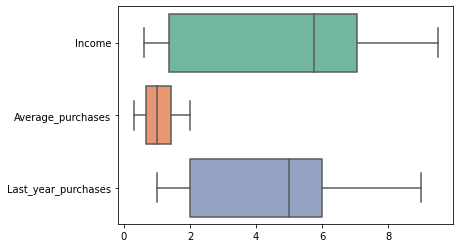

In [8]:
ax=sns.boxplot(data=df,orient = "h",palette="Set2")

*hasil tdk ada data outlier

7.Data preprocessing : dilakukan normalisasi/standarisasi z-score dengan menggunakan fungsi StandardScaler  kemudian hasilnya disimpan sebagai sebuah dataframe dengan nama “std_atr” (standardized attibutes)

In [9]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
std_atr=scale.fit_transform(df)
std_atr=pd.DataFrame(std_atr,columns=df.columns)
print(std_atr)

      Income  Average_purchases  Last_year_purchases
0   0.963035           1.127453             0.139140
1  -1.325027          -0.879695            -1.451031
2   0.758134          -0.043384             0.536683
3   1.031336           0.792928             0.139140
4  -1.359177          -1.465113            -1.053488
5  -1.188426          -0.816972            -1.053488
6   1.406988           1.901041             0.139140
7  -1.495778          -1.339667            -1.451031
8  -1.427478          -0.942419            -1.053488
9   1.031336           1.022914             1.729311
10  0.211731           1.399254             1.331768
11  0.587383           0.667481             0.536683
12  0.382482          -0.733341            -0.258403
13  0.484933          -0.712433            -0.258403
14  0.245881           1.231991             1.331768
15  0.348332          -0.670617            -0.258403
16 -1.495778          -1.423298            -1.053488
17 -1.256727          -1.046958            -1.

8. Model tuning
Pada algoritma k-means clustering terdapat nilai parameter k, sehingga sebelum diputuskan subjektif nilai k, dapat dilakukan model tuning, misalnya dengan metode Elbow.

Nilai inertia akan semakin kecil dengan bertambahnya jumlah cluster dengan nilai k optimal diperoleh dari titik balik, yang mana penurunan inertia sudah relatif “kecil”, dicirikan dengan kurva mulai landai.

Input fungsi KMeans:


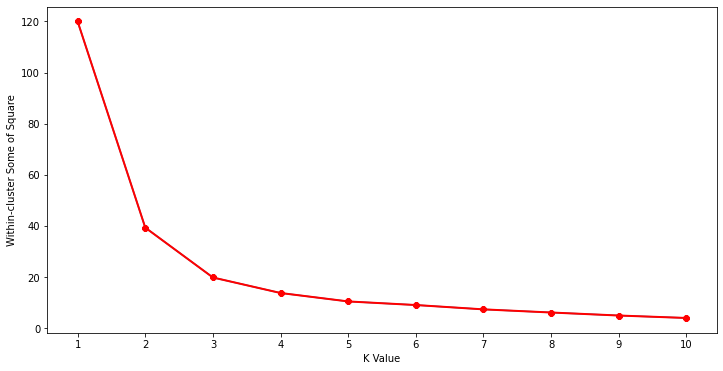

In [11]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit(std_atr)
  wcss.append(km.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Within-cluster Some of Square")
plt.show()


*pada Kvalue ketiga mulai terjadi pengecilan penurunan, kemungkinan pada nilai tersebut merupakan KValue yg optimal

Untuk lebih meyakinkan berapa nilai k optimal, dilakukan analisa silhouette coefficient berdasarkan konfigurasi setiap anggota clusternya. Visualisasi dilakukan dengan menggunakan fungsi SilhouetteVisualizer.


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6439b75640>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

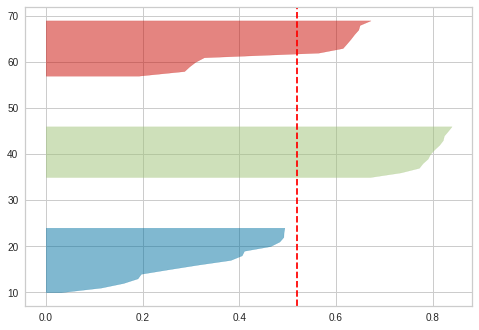

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer
model=KMeans(3,random_state=42)
visualizer=SilhouetteVisualizer(model,colors='yellowbrick')
visualizer.fit(std_atr)


*Hasil : semua objek data memiliki skor silhouette positif, hal ini mengindikasikan bahwa objek-objek sudah dikelompokkan pada konfigurasi yang sesuai.

Menampilkan skor silhouette coefficient  pada k=3, dan nilai-nilai k yang lain


SilhouetterScore : 0.520
For n_clusters=2, Silhouette coeffecient = 0.5756607240004831
For n_clusters=3, Silhouette coeffecient = 0.5197049948622443
For n_clusters=4, Silhouette coeffecient = 0.5267147220269506
For n_clusters=5, Silhouette coeffecient = 0.48027850753668916
For n_clusters=6, Silhouette coeffecient = 0.5069249121555096
For n_clusters=7, Silhouette coeffecient = 0.5033221437686499
For n_clusters=8, Silhouette coeffecient = 0.536313289850898
For n_clusters=9, Silhouette coeffecient = 0.53685137242953
For n_clusters=10, Silhouette coeffecient = 0.3981363276649469
For n_clusters=11, Silhouette coeffecient = 0.433866400100106
For n_clusters=12, Silhouette coeffecient = 0.42184231424597013
For n_clusters=13, Silhouette coeffecient = 0.44318926436870676
For n_clusters=14, Silhouette coeffecient = 0.4109616164052987


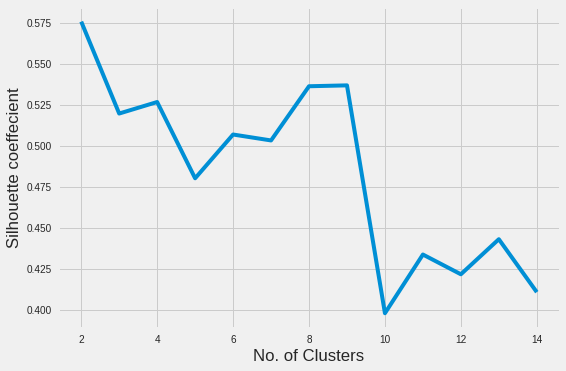

In [35]:
from sklearn.metrics import silhouette_score
km=KMeans(n_clusters=3,random_state=42)
km.fit(std_atr)
score=silhouette_score(std_atr,km.labels_)
print('SilhouetterScore : %.3f' % score)

from sklearn.metrics import silhouette_score
k_cluster = []
sil_coeffecients = []


for n_cluster in range(2,15):
  kmeans = KMeans(n_clusters=n_cluster).fit(std_atr)
  label = kmeans.labels_
  sil_coeff = silhouette_score(std_atr, label)
  print("For n_clusters={}, Silhouette coeffecient = {}".format(n_cluster , sil_coeff))
  sil_coeffecients.append(sil_coeff)
  k_cluster.append(n_cluster)

plt.plot(k_cluster,sil_coeffecients)
plt.ylabel('Silhouette coeffecient')
plt.xlabel('No. of Clusters')
plt.show()


9. Model building.
Setelah nilai k terpilih (k=3), selanjutnya dilakukan pembangunan model 3-means clustering  dengan menggunakan fungsi Kmeans dan input atribut-atribut yang sudah dinormalisasi. Hasil dari clustering disajikan dalam sebuah dataframe dengan nama “hasil”.

In [25]:
model=KMeans(init="random",n_clusters=3)
model.fit(std_atr)
print('inertia:',model.inertia_)
print('cluster_centroids:',model.cluster_centers_)

clt=model.labels_
hasil=pd.Series(clt,name="Cluster")
hasil=pd.DataFrame(hasil)


inertia: 19.812698382869723
cluster_centroids: [[ 0.21435809 -0.18652161  0.04739934]
 [-1.36202323 -1.12187713 -1.25225991]
 [ 0.90384157  1.05915376  0.9607285 ]]


10.Model visualization

Hasil dari clustering selanjutnya dapat dilakukan visualisasi kedalam plot 2 dimensi. Dengan jumlah atribut sebanyak 3, untuk membuat plot 2 dimensi dapat dilakukan teknik reduksi data dengan PCA.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


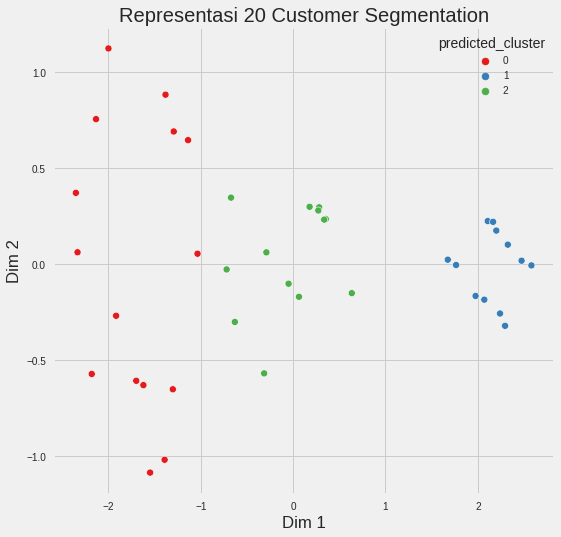

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
preprocessor=Pipeline([("scaler",StandardScaler()),("pca",PCA(n_components=2,random_state=42)),])
clusterer=Pipeline([("kmeans",KMeans(n_clusters=3,init="k-means++",n_init=50,max_iter=500,random_state=42,),),])
pipe=Pipeline([("preprocessor",preprocessor),("clusterer",clusterer)])
pipe.fit(df)

preprocessor_data=pipe["preprocessor"].transform(df)
predicted_labels=pipe["clusterer"]["kmeans"].labels_

pcadf=pd.DataFrame(pipe["preprocessor"].transform(df),columns=["Dim 1","Dim 2"],)
pcadf["predicted_cluster"]=pipe["clusterer"]["kmeans"].labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
scat=sns.scatterplot("Dim 1","Dim 2", s=50,data=pcadf,hue="predicted_cluster", palette="Set1",)
scat.set_title("Representasi 20 Customer Segmentation")
plt.show()


11.Result

Dari data std_atr dan centroid, didapatkan pembagian klusterisasi utk masing2 data:

Cluster mana yg terbaik dilihat dari hasil point 9. Centroid-nya
